## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [267]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sn
from datetime import datetime

In [125]:
#sample = pd.read_csv('random_sample.txt')
sample

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,B6,B6,B6,317,B6,N266JB,317,10721,BOS,...,187,21.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2018-01-01,B6,B6,B6,746,B6,N605JB,746,14254,PSE,...,1617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,B6,B6,B6,1202,B6,N907JB,1202,11697,FLL,...,1069,11.0,0.0,31.0,0.0,55.0,NaN,NaN,NaN,NaN
3,2018-01-01,B6,B6,B6,2679,B6,N358JB,2679,10721,BOS,...,200,41.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2018-01-01,B6,B6,B6,2904,B6,N955JB,2904,14843,SJU,...,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106438,2019-07-31,DL,DL,DL,2880,DL,N6702,2880,13204,MCO,...,957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106439,2019-07-31,DL,DL,DL,2896,DL,N997AT,2896,11637,FAR,...,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106440,2019-07-31,DL,DL,DL,2908,DL,N304DN,2908,10397,ATL,...,1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106441,2019-07-31,AA,AA,AA,445,AA,N404AN,445,12892,LAX,...,370,1.0,0.0,0.0,0.0,22.0,NaN,NaN,NaN,NaN


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

C:\Users\broug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

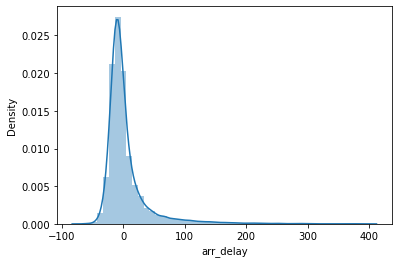

In [279]:
sn.distplot(sample['arr_delay'])

<AxesSubplot:ylabel='arr_delay'>

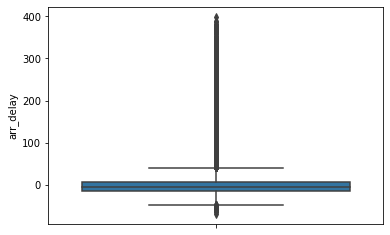

In [144]:
sn.boxplot(data=sample, y=sample['arr_delay'])

In [137]:
st.normaltest(sample['arr_delay'])

NormaltestResult(statistic=81296.11388603451, pvalue=0.0)

In [138]:
st.ttest_1samp(sample['arr_delay'], 0)

Ttest_1sampResult(statistic=33.92519802701809, pvalue=7.112129035425996e-251)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [145]:
pd.read_csv('G_PSQL_data/arr_delay_avg_permonth_peryear.txt')

,avg,month,year
0,3.180875,1,2018
1,4.714467,1,2019
2,4.144116,2,2018
3,9.306549,2,2019
4,2.119581,3,2018
5,3.487239,3,2019
6,3.597966,4,2018
7,4.710994,4,2019
8,5.977482,5,2018
9,7.031468,5,2019


In [146]:
pd.read_csv('G_PSQL_data/median by month.txt')

,percentile_cont,date_part
0,-7,1
1,-6,2
2,-7,3
3,-7,4
4,-6,5
5,-4,6
6,-5,7
7,-5,8
8,-8,9
9,-7,10


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [232]:
times = sample.groupby(sample['dep_time'].dt.hour)['dep_time', 'taxi_in'].mean().reset_index()

C:\Users\broug\AppData\Local\Temp\ipykernel_12364\1027386506.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  times = sample.groupby(sample['dep_time'].dt.hour)['dep_time', 'taxi_in'].mean().reset_index()


In [234]:
temp = sample.groupby(sample['arr_time'].dt.hour)['arr_time', 'taxi_out'].mean().reset_index()

C:\Users\broug\AppData\Local\Temp\ipykernel_12364\1062359235.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = sample.groupby(sample['arr_time'].dt.hour)['arr_time', 'taxi_out'].mean().reset_index()


In [248]:
times.rename(columns={'dep_time': 'time'}, inplace=True)

In [253]:
taxi_times = temp.merge(times)
taxi_times

,time,taxi_out,taxi_in
0,1.0,19.082609,7.930233
1,2.0,19.051724,6.785714
2,3.0,18.465686,8.074074
3,4.0,15.578595,8.716578
4,5.0,17.107632,8.263859
5,6.0,14.922807,8.364989
6,7.0,15.756210,8.543466
7,8.0,16.440104,7.531241
8,9.0,17.691842,7.062729
9,10.0,18.484798,7.187446


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [325]:
arrdelay = sample2[sample2['arr_delay'] > 0]

In [339]:
ards = len(sample2['arr_delay'])

In [340]:
depds = len(sample2[(sample2['dep_delay'] > 0)])

In [343]:
(depds / ards) * 100

33.92278975955839

In [350]:
arrdelay.drop(columns=['arr_time', 'dep_time'], inplace=True)

C:\Users\broug\AppData\Local\Temp\ipykernel_12364\1717101276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrdelay.drop(columns=['arr_time', 'dep_time'], inplace=True)


In [358]:
arrdelay[['arr_delay', 'dep_delay']][arrdelay['arr_delay'] < arrdelay['dep_delay']]

,arr_delay,dep_delay
6,40.0,50.0
11,74.0,93.0
34,2.0,12.0
51,78.0,96.0
66,34.0,47.0
...,...,...
115012,10.0,19.0
115016,117.0,126.0
115018,31.0,35.0
115037,201.0,226.0


#### **Task 6**: How many states cover 50% of US air traffic? 

In [377]:
sample2['origin_states'] = sample2['origin_city_name'].str[-2:]

In [378]:
sample2['dest_states'] = sample2['dest_city_name'].str[-2:]

In [387]:
state_size = sample2.groupby(['origin_states', 'dest_states']).size().reset_index().groupby('origin_states').sum().reset_index().sort_values(by=0, ascending=False)

In [413]:
state_size.mean()

C:\Users\broug\AppData\Local\Temp\ipykernel_12364\1755980020.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  state_size.mean()


0    2170.698113
dtype: float64

In [419]:
state_size.reset_index(drop=True, inplace=True)

In [421]:
state_size['cumsum'] = state_size[0].cumsum()

In [424]:
state_size[state_size['cumsum'] < (len(sample2) / 2)]

,origin_states,0,cumsum
0,CA,12668,12668
1,TX,11039,23707
2,FL,8237,31944
3,IL,7355,39299
4,NY,6106,45405
5,GA,6014,51419
6,NC,5320,56739


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [434]:
sample2['miles_per_min'] = sample2['distance'] / sample2['actual_elapsed_time']

In [438]:
delayed = sample2[sample2['dep_delay'] > 0]['miles_per_min']

In [447]:
early = sample2[sample2['dep_delay'] <= 0]['miles_per_min']

In [451]:
early

177

In [453]:
st.ttest_ind(delayed.dropna(), early.dropna(), alternative='greater')

Ttest_indResult(statistic=20.53247261593684, pvalue=8.18742343286281e-94)

In [ ]:
# YES without a doubt planes delayed fly faster

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [454]:
sample2['dep_time'] = pd.to_datetime(sample3['dep_time'], format='%H%M', errors='coerce') 

In [457]:
sample2['dep_time'] = sample2['dep_time'].round('60min')

In [471]:
sample2['dist_cats'] = pd.qcut(sample2['distance'], 3, labels=['short', 'medium', 'long'])

In [473]:
sample2['hour'] = sample2['dep_time'].dt.hour

In [491]:
s = sample2.groupby(['hour', 'dist_cats']).size().reset_index()

In [508]:
s.sort_values(0, ascending=False).groupby('dist_cats').head(3)

,hour,dist_cats,0
23,7.0,long,2714
26,8.0,long,2678
54,18.0,short,2588
19,6.0,medium,2507
37,12.0,medium,2474
32,10.0,long,2464
18,6.0,short,2451
30,10.0,short,2432
31,10.0,medium,2426


#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [545]:
airports = sample2.groupby(['origin_airport_id', 'dest_airport_id'], as_index=False).size().groupby('origin_airport_id', as_index=False).agg({'size': 'sum'}).sort_values(by='size', ascending=False)

In [519]:
passengers = pd.read_csv('passenger sample.txt')

In [539]:
passeng = passengers.groupby(['origin_airport_id', 'dest_airport_id'], as_index=False).sum().groupby('origin_airport_id', as_index=False).agg({'passengers': 'sum'})

In [548]:
passeng = passeng.sort_values(by='passengers', ascending=False)

In [549]:
ftable = airports.merge(passeng, on='origin_airport_id', how='inner')

In [550]:
ftable

,origin_airport_id,size,passengers
0,13930,5759,10908875
1,10397,5597,14984886
2,11298,4062,9582222
3,11292,3830,8629178
4,12892,3680,11816830
...,...,...,...
73,15370,253,461132
74,12954,250,461229
75,12982,209,488757
76,12758,206,570159


In [551]:
ftable['flights'] = ftable['size']
ftable.drop(columns='size', inplace=True)

In [554]:
ftable['flights/passengers'] = ftable['flights'] / ftable['passengers'] * 100

,origin_airport_id,passengers,flights,flights/passengers
0,13930,10908875,5759,0.052792
1,10397,14984886,5597,0.037351
2,11298,9582222,4062,0.042391
3,11292,8629178,3830,0.044384
4,12892,11816830,3680,0.031142
...,...,...,...,...
73,15370,461132,253,0.054865
74,12954,461229,250,0.054203
75,12982,488757,209,0.042762
76,12758,570159,206,0.036130


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?